# Unsupervised Learning | Project 2
Please follow the below steps to complete the project ( 30 points)
1. Read the dataset and understand the features and target variable. 2 points
2. Encode independent features. 2 points
3. Separate the dependant variable from the rest of the train data 1 point
4. Split the dataset into training and test data ( Take 80:20 ratio). 1 points
5. Apply PCA on the independent features of train data. 1 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 3 points
7. Transform the data using PCA ( select optimum number of PCs). 2 points
8. Apply KMeans algorithm on the above transformed data. 3 points
9. Select optimal number of clusters and form clusters out of the train data. 5 points
10. Create a new column in the train data and populate it with the cluster labels. 2 points
11. Transform the test data using the same PCA object that was fit on the train data. 2 points
12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 2 points
13. Apply any classification model (example: Logistic Regression) on train dataset and predict target for test dataset. 3 points
14. Check accuracy and confusion matrix. 1 point

# 1. Read the dataset and understand the features and target variable. 2 points

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('Qualitative_Bankruptcy.data.txt', header=None)

#Giving column names
df.columns = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']

#Checking if Dataset is loaded properly
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [3]:
#Checking unique values in each columns
for col in df.columns:
    print("Unique values in column", col, "are", df[col].unique())

Unique values in column Industrial Risk are ['P' 'N' 'A']
Unique values in column Management Risk are ['P' 'N' 'A']
Unique values in column Financial Flexibility are ['A' 'P' 'N']
Unique values in column Credibility are ['A' 'P' 'N']
Unique values in column Competitiveness are ['A' 'P' 'N']
Unique values in column Operating Risk are ['P' 'N' 'A']
Unique values in column Class are ['NB' 'B']


# Summary:
In this Dataset, we have Indutrial Risk, Management Risk, Financial Flexibility, Credibility, Competiteveness & Operating Risk as the Features which have values P = Postive, A = Average & N = Negative which determine our Target column Class if it leads to B = Bankruptcy or NB = Non-bankruptcy

# 2. Encode independent features. 2 points

In [4]:
#Since, we have all the Features having values P = Postive, A = Average & N = Negative, we can simply replace them by numeric values as 1 for Positive, 0 for Average & -1 for Negative as it is ordinal data
df.replace(['P','A','N'],[1,0,-1], inplace=True)

#Checking the Dataset
df.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,1,1,0,0,0,1,NB
1,-1,-1,0,0,0,-1,NB
2,0,0,0,0,0,0,NB
3,1,1,1,1,1,1,NB
4,-1,-1,1,1,1,-1,NB


# Summary:
We had all Features with values P = Positive, A = Average & N = Negative.

Since, these are all ordinal values, we encode them with 1 for Positive, 0 for Average & -1 for Negative

# 3. Separate the dependant variable from the rest of the train data 1 point

In [5]:
#Seperating dependant variables & independent variable
X = df.drop('Class', axis=1)
y = df['Class']

#Let's check both Datasets
print(X.head())
print(y.head())

   Industrial Risk  Management Risk  Financial Flexibility  Credibility  \
0                1                1                      0            0   
1               -1               -1                      0            0   
2                0                0                      0            0   
3                1                1                      1            1   
4               -1               -1                      1            1   

   Competitiveness  Operating Risk  
0                0               1  
1                0              -1  
2                0               0  
3                1               1  
4                1              -1  
0    NB
1    NB
2    NB
3    NB
4    NB
Name: Class, dtype: object


# Summary:
We have seperated out Dependent variables & Independent variables

# 4. Split the dataset into training and test data ( Take 80:20 ratio). 1 points

In [6]:
#Importing train_test_split submodule from model_selection module in sklearn library
from sklearn.model_selection import train_test_split

#Splitting the dataset into training & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=5)

#Checking the datasets
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

     Industrial Risk  Management Risk  Financial Flexibility  Credibility  \
97                 1                0                      0            1   
207               -1               -1                     -1           -1   
216                1               -1                     -1           -1   
40                 0                0                      0            0   
236                1               -1                     -1           -1   

     Competitiveness  Operating Risk  
97                 1              -1  
207               -1               0  
216               -1              -1  
40                 1              -1  
236               -1              -1  
     Industrial Risk  Management Risk  Financial Flexibility  Credibility  \
93                 0                0                     -1            1   
153               -1               -1                      0           -1   
199               -1               -1                     -1            

# Summary:
We have split the dataset into Training & testing data in the ration of 80:20

# 5. Apply PCA on the independent features of train data. 1 point

In [7]:
#Constructing Covariance Matrix
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[0.67741365 0.17248193 0.10750201 0.00987952 0.18702008 0.10337349]
 [0.17248193 0.67471486 0.16812851 0.20714859 0.22194378 0.15269076]
 [0.10750201 0.16812851 0.64507631 0.35052209 0.48604016 0.08160643]
 [0.00987952 0.20714859 0.35052209 0.69116466 0.4951004  0.20843373]
 [0.18702008 0.22194378 0.48604016 0.4951004  0.77680321 0.16192771]
 [0.10337349 0.15269076 0.08160643 0.20843373 0.16192771 0.75542169]]


In [8]:
#Calculating Eigen vectors & Eigen values from covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.20835217 -0.57816752 -0.60651464 -0.40059741  0.21635336 -0.21717417]
 [-0.32451895 -0.37153755 -0.15279813  0.84813966 -0.06299924  0.09995122]
 [-0.45435426  0.29863361 -0.16366312 -0.12852712  0.38341639  0.7169848 ]
 [-0.48961383  0.26591507  0.25448081  0.08374788  0.49344879 -0.6118019 ]
 [-0.57374307  0.22682819 -0.12135433 -0.18335098 -0.74613238 -0.11962393]
 [-0.27556528 -0.56243958  0.70888627 -0.2510584  -0.0448213   0.20041576]]

 Eigen Values 
%s [1.85543076 0.75537135 0.66232833 0.4950457  0.17384749 0.27857075]


# Summary:
Eigen vectors give us the direction of the Principal components & Eigen values help us determine how much variance is explained by each Principal components.
After plotting the Elbow plot, we can determine how many Principal Components are capturing 95% variance & then we can discard the remaining ones which will help us reduce the dimensions which in turn helps us to regularize the model well without loosing much information; in other words we are trying to capture maximum signal & avoiding Principal components that are contributing lot of noise and very little signal.

# 6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 3 points

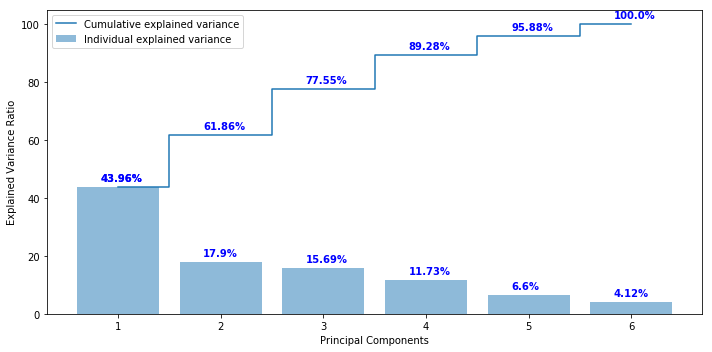

In [9]:
#Capturing Total of all Eigen values
tot = sum(eig_vals)

#Calculating explained variance for each Principal Components after sorting each PCs by decreasing values of Eigen values
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]

#Calculating the cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

#Plotting both explained variance & cumulative variance
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
for i, v in enumerate(var_exp):
    plt.text(i + .83, v + 2, str(np.round(v, 2)) + '%', color='blue', fontweight='bold')
for i, v in enumerate(cum_var_exp):
    plt.text(i + .83, v + 2, str(np.round(v, 2)) + '%', color='blue', fontweight='bold')
plt.show()

# Summary:
From the above elbow plot, we can see that first principal component is able to explain over 40% of the variance alone & rest of them do not contribute more than 20% each.

And also, we can see that 5 Principal components together explain 95.88% of variance. So, we can discard one Principal Component to reduce the dimensions which is useful as explain above.

# 7. Transform the data using PCA ( select optimum number of PCs). 2 points

In [10]:
#Importing PCA submodule from decomposition module in sklearn library
from sklearn.decomposition import PCA

#Since, we want to discard one PC out of 6, we use no. of components as 5 for transforming the Training data using PCA
pca = PCA(n_components=5)
X_reduced = pd.DataFrame(pca.fit_transform(X_train))

#Checking the new Training Dataset with reduced feature
X_reduced.head()

,0,1,2,3,4
0,1.321459,0.167035,-1.204752,-0.041196,1.007517
1,-1.690285,0.258706,0.818770,-0.170573,-0.305722
2,-1.601378,-0.624858,-1.041131,-0.576246,0.308314
3,0.664820,0.571964,-0.867308,0.232953,0.139804
4,-1.601378,-0.624858,-1.041131,-0.576246,0.308314


# Summary:
Using PCA, we have transformed the data to define data points in terms of new Principal Components

# 8. Apply KMeans algorithm on the above transformed data. 3 points

For no. of clusters = 2 , the average silhouette_score is : 0.348653238829659


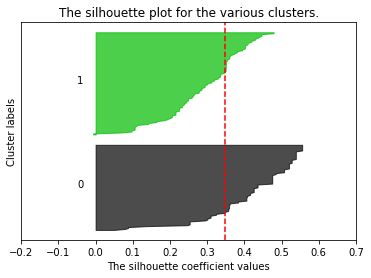

For no. of clusters = 3 , the average silhouette_score is : 0.3031526882925692


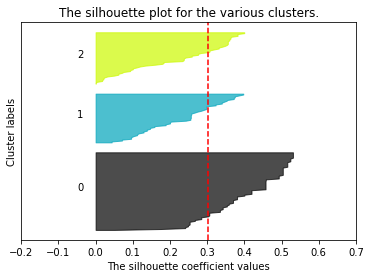

For no. of clusters = 4 , the average silhouette_score is : 0.2582332183054431


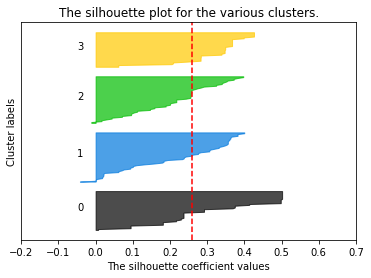

For no. of clusters = 5 , the average silhouette_score is : 0.27392971237773434


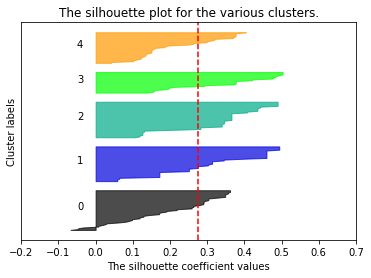

For no. of clusters = 6 , the average silhouette_score is : 0.28466333609774136


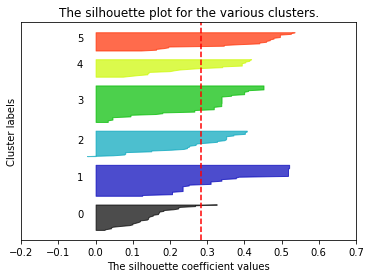

For no. of clusters = 7 , the average silhouette_score is : 0.30342722373738495


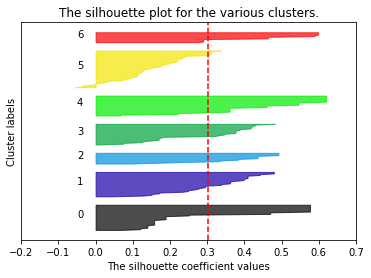

For no. of clusters = 8 , the average silhouette_score is : 0.2965365508627885


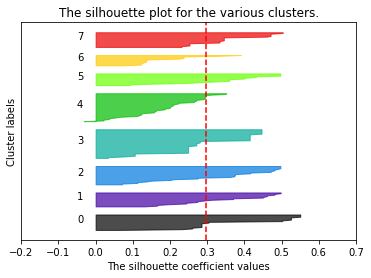

For no. of clusters = 9 , the average silhouette_score is : 0.3237397511766704


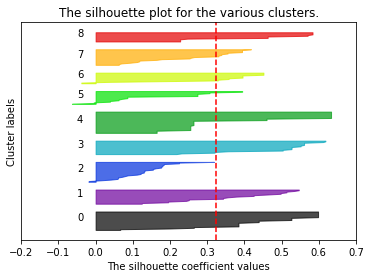

For no. of clusters = 10 , the average silhouette_score is : 0.33331342903581684


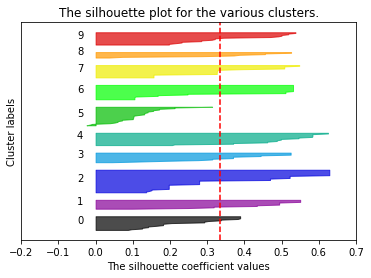

For no. of clusters = 11 , the average silhouette_score is : 0.33187468759445965


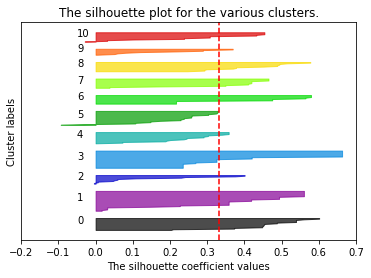

For no. of clusters = 12 , the average silhouette_score is : 0.3479276875137928


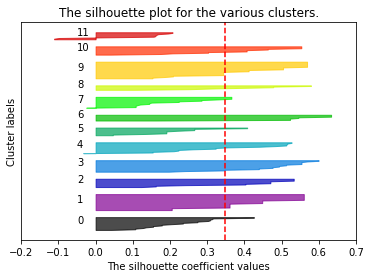

For no. of clusters = 13 , the average silhouette_score is : 0.35080666723066545


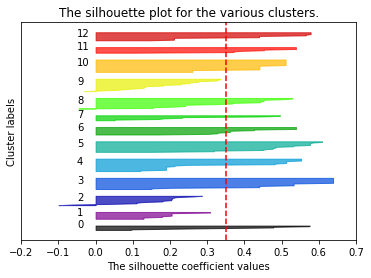

For no. of clusters = 14 , the average silhouette_score is : 0.3576239916054085


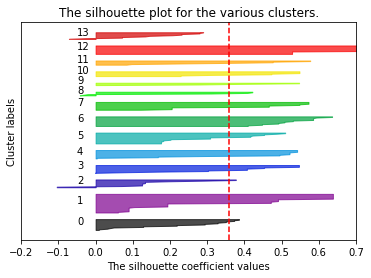

For no. of clusters = 15 , the average silhouette_score is : 0.35299557416149824


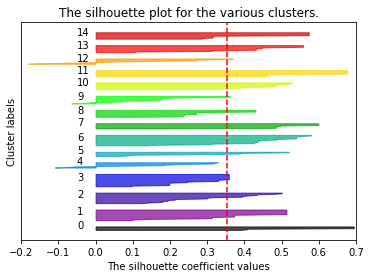

In [11]:
#Importing KMeans submodule from cluster module in sklearn library
from sklearn.cluster import KMeans

#Importing metrics module from sklearn library
from sklearn import metrics

#Importing cm module from matplotlib library for ColorMaps
import matplotlib.cm as cm

#Assigning a dummy arrays Cluster_error & cluster_sil_scores
Cluster_error = []
cluster_sil_scores = []

#Defining cluster range from 1 to 15
cluster_range = range(1, 16)

#Fit model KMeans for each value of cluster in the range defined in cluster_range
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state = 5)
    clusters.fit(X_reduced)
    Cluster_error.append(clusters.inertia_)
    labels = clusters.labels_

    #Since, silhouette score is not possiblr for 1 cluster, we skip it
    if num_clusters == 1:
        cluster_sil_scores.append(np.NaN)
        continue
        
    cluster_sil_scores.append(metrics.silhouette_score(X_reduced, labels, metric='euclidean'))

    #The silhouette_score gives the average value for all the samples.
    #This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = metrics.silhouette_score(X_reduced, labels)
    print("For no. of clusters =", num_clusters, ", the average silhouette_score is :", silhouette_avg)

    #Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X_reduced, labels)
    
    y_lower = 10
    for i in range(num_clusters):
        #Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        #Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        #Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster labels")
    plt.yticks([])
    plt.xlim([-0.2, 0.7])

    #The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    #Show the plot for each number of clusters
    plt.show()

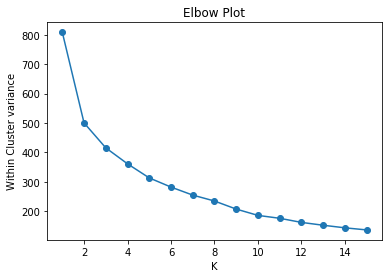

In [12]:
#Plotting Elbow plot
plt.plot(cluster_range, Cluster_error, marker = "o")
plt.xlabel('K')
plt.ylabel('Within Cluster variance')
plt.title('Elbow Plot')
plt.show()

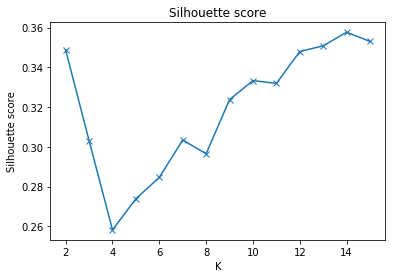

In [13]:
#Plotting Silhouette score
plt.plot(cluster_range, cluster_sil_scores, marker = 'x')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.title('Silhouette score')
plt.show()

# Summary:
We have applied the KMeans Algorithm & plotted Silhouette, Elbow plot & Sillhouette score plots for number of clusters between 1 & 15.

This will be useful further to determine optimal number of clusters in the PCA transformed data

# 9. Select optimal number of clusters and form clusters out of the train data. 5 points

In [14]:
#Studying Elbow plot shows that there might be 2 to 5 clusters after which within cluster variance is decreasing very gradually.
#But the bend is not very clear.

#Studying Silhouette score plot, the best no. of cluster seems to be 2, 7, 10 or 14 where we can see some peaks.

#Now, let's study the Silhouette plot carefully.
#For 2 clusters, we have very good above average silhouette scores, cluster size are almost identical.
#For 3 clusters, all clusters have good above average silhouette scores, but cluster size for cluster 3 is almost double the other 2.
#For 4 & 5 clusters, all clusters have good above average silhouette scores but there are some misclassification cases beginning to appear.
#Beyond 5 clusters, either the cluster size are not identical or there are few clusters with below average sillhouette scores or we have some cases of misclassifications

#So, from above analysis, we can select 2 clusters which is unanimously shown as winner from all the 3 plots above.

In [15]:
#Let's retrain KMeans model with K=2
clusters = KMeans(2, random_state = 5)
clusters.fit(X_reduced)
labels = clusters.labels_

# Summary:
We have selected optimal number of clusters as 2 after studying Elbow plot, Silhouette score plot & Silhouette plots.

Then, we retrained KMeans model with K=2 clusters & formed 2 clusters in our Dataset

# 10. Create a new column in the train data and populate it with the cluster labels. 2 points

In [16]:
#Seperating the clusters by adding a column 'GROUP' to identify each cluster
X_reduced['GROUP'] = labels

#Checking the new DataFrame
X_reduced.head()

,0,1,2,3,4,GROUP
0,1.321459,0.167035,-1.204752,-0.041196,1.007517,1
1,-1.690285,0.258706,0.818770,-0.170573,-0.305722,0
2,-1.601378,-0.624858,-1.041131,-0.576246,0.308314,0
3,0.664820,0.571964,-0.867308,0.232953,0.139804,1
4,-1.601378,-0.624858,-1.041131,-0.576246,0.308314,0


# Summary:
We have created a new column in the train data & populated it with Cluster labels

# 11. Transform the test data using the same PCA object that was fit on the train data. 2 points

In [17]:
#Trasforming test data using same PCA object that we used to fit Training data
X_test_reduced = pd.DataFrame(pca.transform(X_test))

#Checking transformed Dataset
X_test_reduced.head()

,0,1,2,3,4
0,1.176010,-0.310477,1.062760,-0.167856,1.173746
1,-1.460676,0.950710,-0.134467,-0.005268,-0.853229
2,-0.980365,1.241574,0.466486,0.343567,1.112711
3,1.390700,1.701754,0.502392,-0.633047,-0.165128
4,-0.949486,0.068268,1.795601,-0.406076,0.180713


# Summary:
We have transpormed test dataset with same PCA object that we used to fit Training data

# 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 2 points

In [18]:
#Predicting Cluster label using same KMeans object used to fit Training Dataset
labels = clusters.predict(X_test_reduced)

#Seperating the clusters by adding a column 'GROUP' to identify each cluster
X_test_reduced['GROUP'] = labels

#Checking the new DataFrame
X_test_reduced.head()

,0,1,2,3,4,GROUP
0,1.176010,-0.310477,1.062760,-0.167856,1.173746,1
1,-1.460676,0.950710,-0.134467,-0.005268,-0.853229,0
2,-0.980365,1.241574,0.466486,0.343567,1.112711,0
3,1.390700,1.701754,0.502392,-0.633047,-0.165128,1
4,-0.949486,0.068268,1.795601,-0.406076,0.180713,0


# Summary:
Using the same KMeans object we used to fit Training Dataset, we have assigned the Labels to Test Dataset & we stored it as a Feature

# 13. Apply any classification model (example: Logistic Regression) on train dataset and predict target for test dataset. 3 points

In [19]:
#Import LogisticRegression module from Scikit learn Linear model
from sklearn.linear_model import LogisticRegression

#Initiate LogisticRegression
model = LogisticRegression()

#Fit the model on training data
model.fit(X_reduced, y_train)

#Predict y for training & test set
y_train_predict = model.predict(X_reduced)
y_test_predict = model.predict(X_test_reduced)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Summary:
We have used Logistic Regression on Train Dataset & predicted target for both training & test dataset

# 14. Check accuracy and confusion matrix. 1 point

In [20]:
#Calculate accuracy on Training & Testing data
model_train_score = model.score(X_reduced, y_train)
model_test_score = model.score(X_test_reduced, y_test)

#Print Accuracy
print("Accuracy of the Logisitic Regression model on Training data is", model_train_score)
print("Accuracy of the Logisitic Regression model on Testing data is", model_test_score)

#Printing Classification report for Training & testing data
print("Classification Report for Training data is:\n", metrics.classification_report(y_train, y_train_predict))
print("Classification Report for Testing data is:\n", metrics.classification_report(y_test, y_test_predict))

#Confusion matrix
print("Confusion matrix is as follows:\n", metrics.confusion_matrix(y_test, y_test_predict))

Accuracy of the Logisitic Regression model on Training data is 0.995
Accuracy of the Logisitic Regression model on Testing data is 1.0
Classification Report for Training data is:
               precision    recall  f1-score   support

           B       1.00      0.99      0.99        88
          NB       0.99      1.00      1.00       112

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Classification Report for Testing data is:
               precision    recall  f1-score   support

           B       1.00      1.00      1.00        19
          NB       1.00      1.00      1.00        31

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion matrix is as follows:
 [[19  0]
 [ 0 31]]


# Summary:
We have calculated accuracy on both Training dataset & test dataset and we can see that accuracy is 100% for Test dataset though it was giving 99.5% accuracy for Training Dataset.

Naturally, if we are having 100% accuracy for test dataset, our confusion matrix will consist of only records in True positive & True negatives which is what we can see.

Since, the accuracy is almost 100% for both Training & Testing dataset, it shows that not only it has maintained maximum signal to noise ratio though we have dropped 1 dimension but also it is generalizing very well.

Only downside is that after transforming the data using PCA, we lose explainability of the model & using KMeans Clustering algorithm on top of it,  we would not be able to explain how the model has dropped a dimension & then formed clusters on that transformed data.

But, if our objective is to get better accuracy over explainability, we can surely use this approach as we can see that it is giving us wonderful results & we can be highly confident of model perfomrnace in Production environment to use Qualitative Parameters of unknown case to predict Bankruptcy.